## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

## Read data

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Check info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


## check missing data

In [5]:
missing_data = df.isna()

missing_data_count = df.isna().sum()

missing_data_count.sort_values(ascending=False)

budget      2171
gross        189
rating        77
company       17
runtime        4
score          3
votes          3
writer         3
country        3
released       2
star           1
name           0
genre          0
year           0
director       0
dtype: int64

In [6]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)

budget      0.283125
gross       0.024648
rating      0.010042
company     0.002217
runtime     0.000522
score       0.000391
votes       0.000391
writer      0.000391
country     0.000391
released    0.000261
star        0.000130
name        0.000000
genre       0.000000
year        0.000000
director    0.000000
dtype: float64

## check outliers

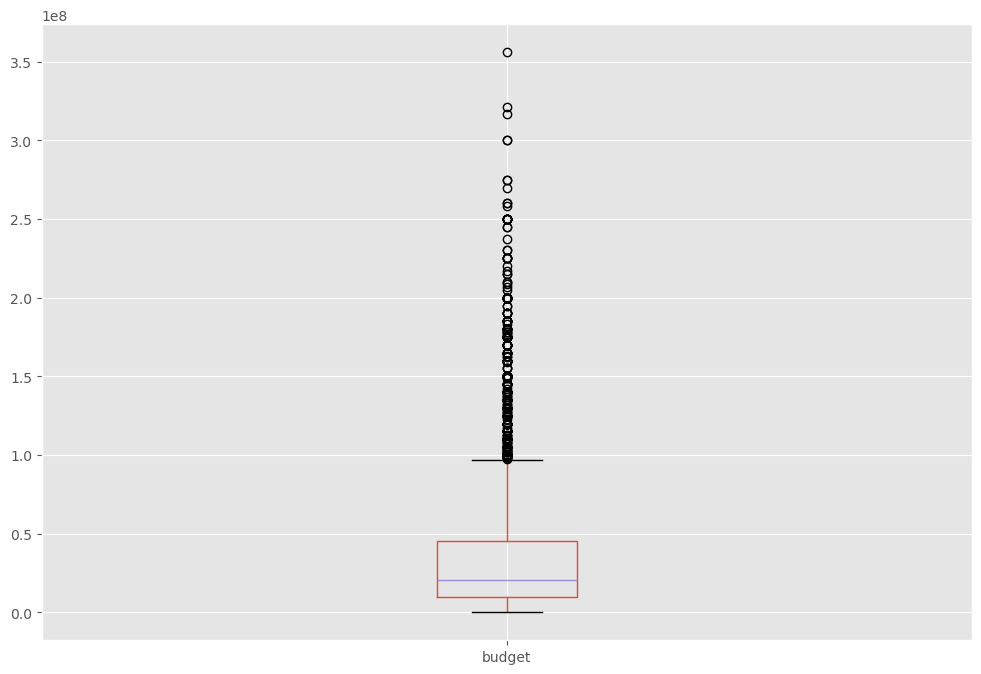

In [7]:
df.boxplot(column=['budget'])
plt.show()

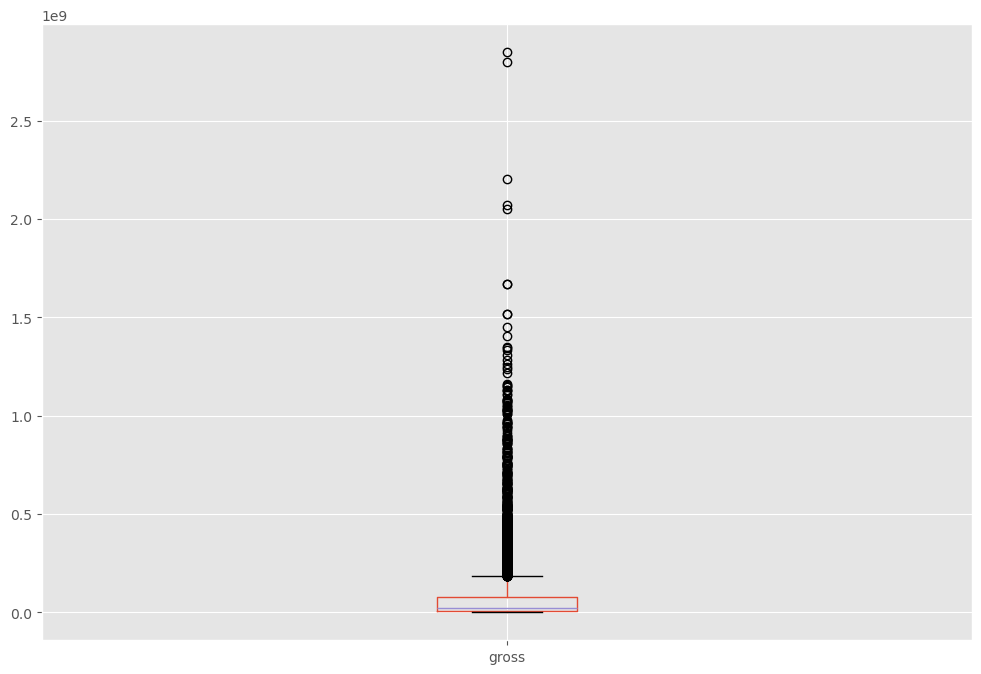

In [8]:
df.boxplot(column=['gross'])
plt.show()

## data cleaning

In [9]:
# We will do following:
# 1. drop na value of gross since they only count for 2.46%
# 2. fill the na value in budget and rest of numeric columns with median to avoid the effect of outliers on the gross mean value
# 3. fill na in categorical column with mode

In [10]:
df_copy = df

In [11]:
# Dropping rows with missing 'gross' since its only present 2.5%
df_cleaned = df_copy.dropna(subset=['gross'])

# For other missing values, we can fill:
# Filling numeric columns with median values
df_cleaned['budget'].fillna(df_cleaned['budget'].median(), inplace=True)
df_cleaned['score'].fillna(df_cleaned['score'].median(), inplace=True)
df_cleaned['votes'].fillna(df_cleaned['votes'].median(), inplace=True)
df_cleaned['runtime'].fillna(df_cleaned['runtime'].median(), inplace=True)

# Filling categorical columns with mode (most frequent value)
df_cleaned['rating'].fillna(df_cleaned['rating'].mode()[0], inplace=True)
df_cleaned['released'].fillna(df_cleaned['released'].mode()[0], inplace=True)
df_cleaned['writer'].fillna(df_cleaned['writer'].mode()[0], inplace=True)
df_cleaned['star'].fillna(df_cleaned['star'].mode()[0], inplace=True)
df_cleaned['country'].fillna(df_cleaned['country'].mode()[0], inplace=True)
df_cleaned['company'].fillna(df_cleaned['company'].mode()[0], inplace=True)

# Confirming that the missing values have been addressed
missing_values_after_cleaning = df_cleaned.isnull().sum()

missing_values_after_cleaning

/var/folders/nv/5xl16ttd6s36_gs068y2nxqh0000gn/T/ipykernel_7538/2111137600.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['budget'].fillna(df_cleaned['budget'].median(), inplace=True)
/var/folders/nv/5xl16ttd6s36_gs068y2nxqh0000gn/T/ipykernel_7538/2111137600.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64

## show data description

In [12]:
df_cleaned.describe()

,year,score,votes,budget,gross,runtime
count,7479.000000,7479.000000,7.479000e+03,7.479000e+03,7.479000e+03,7479.000000
mean,2000.657708,6.398757,9.014732e+04,3.185793e+07,7.850054e+07,107.442439
std,11.054811,0.962966,1.648068e+05,3.604056e+07,1.657251e+08,18.512087
min,1980.000000,1.900000,3.400000e+01,6.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.900000e+03,1.400000e+07,4.532056e+06,95.000000
50%,2001.000000,6.500000,3.400000e+04,2.100000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.600000e+04,3.300000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## check data type

In [13]:
df_cleaned.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## check missing value

In [14]:
for col in df_cleaned.columns:
    pct_missing = np.mean(df_cleaned[col].isna())
    print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


## change data type of some columns for easier analysis

In [15]:
df_cleaned['votes'] = df_cleaned['votes'].astype('int64')
df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
df_cleaned['gross'] = df_cleaned['gross'].astype('int64')
df_cleaned['runtime'] = df_cleaned['runtime'].astype('int64')

/var/folders/nv/5xl16ttd6s36_gs068y2nxqh0000gn/T/ipykernel_7538/2130174190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['votes'] = df_cleaned['votes'].astype('int64')
/var/folders/nv/5xl16ttd6s36_gs068y2nxqh0000gn/T/ipykernel_7538/2130174190.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['budget'] = df_cleaned['budget'].astype('int64')
/var/folders/nv/5xl16ttd6s36_gs068y2nxqh0000gn/T/ipykernel_7538/2130174190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a c

In [16]:
df_cleaned.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
dtype: object

In [17]:
df_cleaned.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


## create a new column for released year

In [18]:
df_cleaned['released'] = df_cleaned['released'].astype(str)

print(df_cleaned['released'].head())

df_cleaned['released_year'] = df_cleaned['released'].str.extract(r'(\d{4})') #r:raw_number, \d{4}:consecutive 4 single digits

df_cleaned

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object


/var/folders/nv/5xl16ttd6s36_gs068y2nxqh0000gn/T/ipykernel_7538/3724823107.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['released'] = df_cleaned['released'].astype(str)
/var/folders/nv/5xl16ttd6s36_gs068y2nxqh0000gn/T/ipykernel_7538/3724823107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['released_year'] = df_cleaned['released'].str.extract(r'(\d{4})')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400,Scott Teems,Scott Teems,Shea Whigham,United States,21000000,3661,Prowess Pictures,98,2020
7655,Legend of Deification,TV-PG,Animation,2020,"October 1, 2020 (United States)",6.6,1300,Teng Cheng,Woody Allen,Guangtao Jiang,China,21000000,240663149,Beijing Enlight Pictures,110,2020
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294,Scott Pryor,Scott Pryor,Scott Pryor,United States,21000000,413378,Pryor Entertainment,120,2020
7657,Leap,R,Drama,2020,"September 25, 2020 (United States)",6.7,903,Peter Ho-Sun Chan,Ji Zhang,Gong Li,China,21000000,25818882,Universal Pictures,135,2020


In [19]:
df_cleaned['released_year']

0       1980
1       1980
2       1980
3       1980
4       1980
        ... 
7653    2020
7655    2020
7656    2020
7657    2020
7659    2020
Name: released_year, Length: 7479, dtype: object

## sort data by gross descending

In [20]:
df_cleaned = df_cleaned.sort_values(by=['gross'],inplace=False,ascending=False) #inplace=False preserves original data in df_cleaned

In [21]:
df_cleaned.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


## drop duplicates

In [22]:
df_cleaned = df_cleaned.drop_duplicates()

## correlation analysis

## turn all non-numeric fields into numeric ones to be able to conduct correlation analysis

In [23]:
df_cleaned.dtypes

name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes              int64
director          object
writer            object
star              object
country           object
budget             int64
gross              int64
company           object
runtime            int64
released_year     object
dtype: object

In [24]:
df_numerized=df_cleaned

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype==('object')):
        df_numerized[col_name]=df_numerized[col_name].astype('category') #transform fields into category first
        df_numerized[col_name]=df_numerized[col_name].cat.codes #then transform them into integer again with .cat.codes, which helps compatibility with machine learning algorithm

In [25]:
df_numerized.dtypes

name               int16
rating              int8
genre               int8
year               int64
released           int16
score            float64
votes              int64
director           int16
writer             int16
star               int16
country             int8
budget             int64
gross              int64
company            int16
runtime            int64
released_year       int8
dtype: object

In [26]:
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
5445,519,5,0,2009,683,7.8,1100000,1116,1719,2233,53,237000000,2847246203,2148,162,29
7445,521,5,0,2019,179,8.4,903000,161,717,2141,53,356000000,2797501328,1532,181,39
3045,6727,5,6,1997,691,7.8,1100000,1116,1719,1524,53,200000000,2201647264,2148,194,17
6663,5008,5,0,2015,685,7.8,876000,1086,2468,504,53,245000000,2069521700,1470,138,35
7244,522,5,0,2018,188,8.4,897000,161,717,2141,53,321000000,2048359754,1532,149,38


## find out correlation

In [27]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_year
name,1.000000,-0.011779,0.017885,0.007404,-0.011033,0.015473,0.011429,0.009092,0.008964,0.007278,-0.012640,0.020096,0.005557,0.007556,0.009138,0.006891
rating,-0.011779,1.000000,0.120856,0.027984,0.023047,0.020423,0.013574,0.012939,-0.001283,0.002181,0.024890,-0.150301,-0.132578,-0.085508,0.070763,0.028682
genre,0.017885,0.120856,1.000000,-0.082252,0.026804,0.046093,-0.149289,-0.016412,0.008465,-0.002322,-0.032234,-0.337453,-0.243059,-0.073803,-0.040984,-0.077869
year,0.007404,0.027984,-0.082252,1.000000,0.002465,0.091821,0.215740,-0.019116,-0.008030,-0.032319,-0.083698,0.288977,0.257486,-0.017709,0.114672,0.997499
released,-0.011033,0.023047,0.026804,0.002465,1.000000,0.044301,0.018043,-0.002315,-0.003679,0.015812,-0.020084,0.014178,0.002341,-0.006048,0.000615,-0.001913
score,0.015473,0.020423,0.046093,0.091821,0.044301,1.000000,0.413096,0.008810,0.019032,0.000310,-0.129840,0.058253,0.186258,-0.003843,0.397314,0.099560
votes,0.011429,0.013574,-0.149289,0.215740,0.018043,0.413096,1.000000,0.000919,0.000284,-0.021274,0.069712,0.457389,0.630757,0.128914,0.309541,0.211400
director,0.009092,0.012939,-0.016412,-0.019116,-0.002315,0.008810,0.000919,1.000000,0.298059,0.036794,0.014918,-0.002036,-0.014490,0.004654,0.016941,-0.018896
writer,0.008964,-0.001283,0.008465,-0.008030,-0.003679,0.019032,0.000284,0.298059,1.000000,0.024408,0.011290,-0.031209,-0.023550,0.003407,-0.003055,-0.008215
star,0.007278,0.002181,-0.002322,-0.032319,0.015812,0.000310,-0.021274,0.036794,0.024408,1.000000,-0.017083,-0.020100,-0.002602,0.004510,0.009226,-0.033085


## summarize correlation analysis

In [28]:
corr_data=df_numerized.corr().unstack()
corr_final=corr_data.sort_values(kind='quicksort') #quicksort, a sorting algorithm efficient with large dataset

corr_final

budget         genre           -0.337453
genre          budget          -0.337453
               gross           -0.243059
gross          genre           -0.243059
budget         rating          -0.150301
                                  ...   
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
Length: 256, dtype: float64

In [29]:
strong_corr=corr_final[abs(corr_final)>0.5] #abs is to extract absolute value
strong_corr

votes          gross            0.630757
gross          votes            0.630757
budget         gross            0.744926
gross          budget           0.744926
year           released_year    0.997499
released_year  year             0.997499
name           name             1.000000
company        company          1.000000
gross          gross            1.000000
budget         budget           1.000000
country        country          1.000000
star           star             1.000000
writer         writer           1.000000
director       director         1.000000
votes          votes            1.000000
score          score            1.000000
released       released         1.000000
year           year             1.000000
genre          genre            1.000000
rating         rating           1.000000
runtime        runtime          1.000000
released_year  released_year    1.000000
dtype: float64

## we can observe that gross/budget and gross/votes are strongly correlated

## visualize the relation between gross and budget

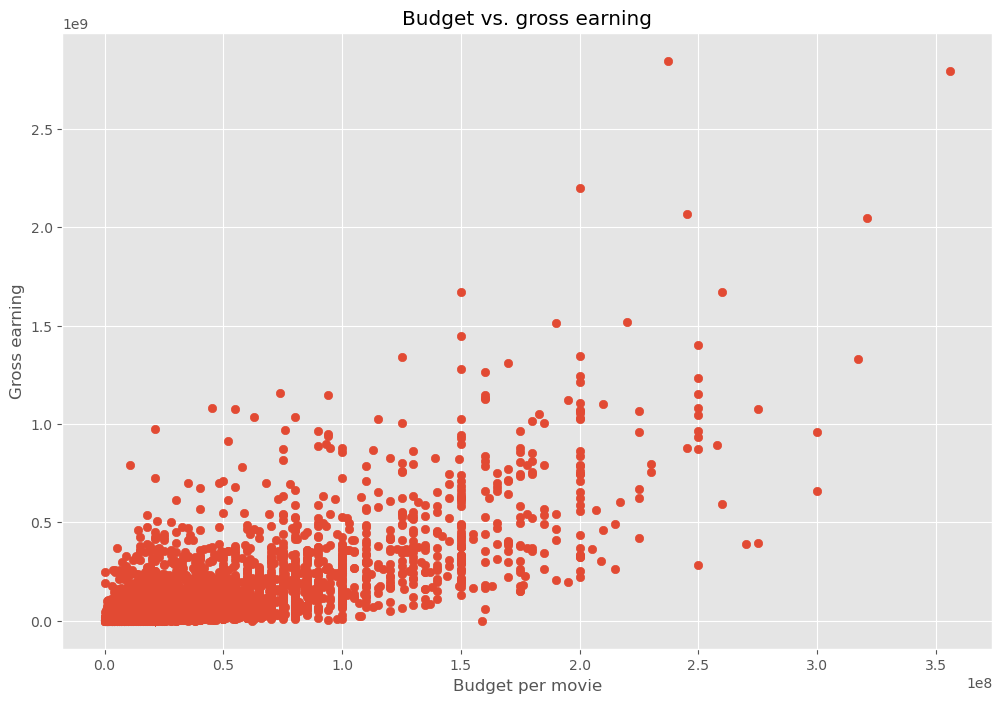

In [30]:
plt.scatter(x=df_numerized['budget'],y=df_numerized['gross'])
plt.title('Budget vs. gross earning')
plt.xlabel('Budget per movie')
plt.ylabel('Gross earning')
plt.show()

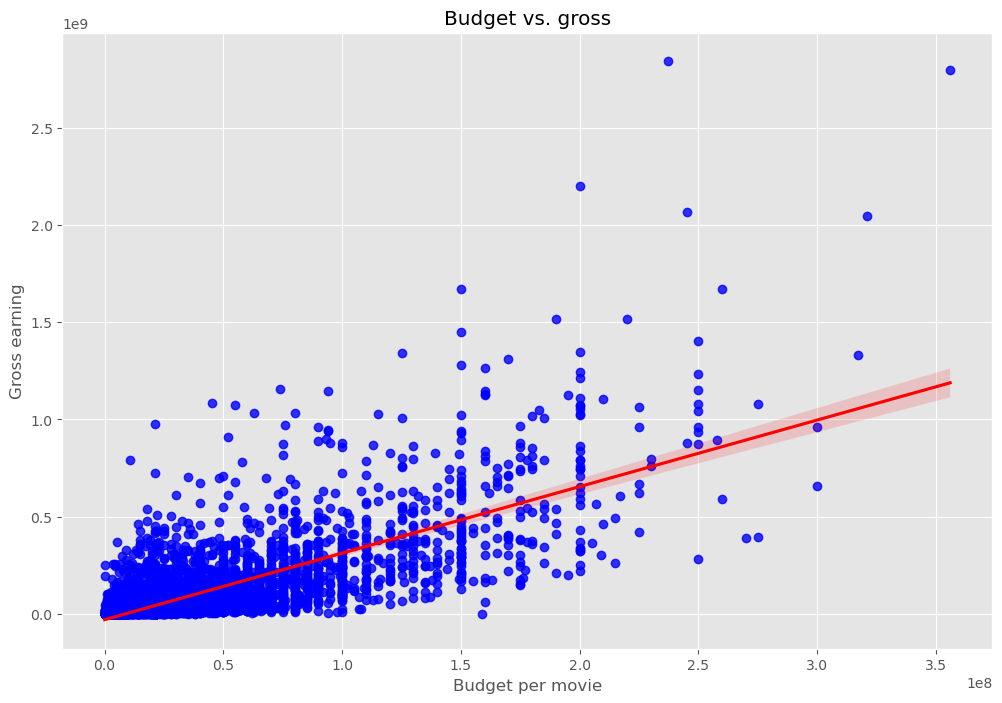

In [31]:
#transform fields to numeric in case of other types and corruptive value
df_numerized['budget']=pd.to_numeric(df_numerized['budget'],errors='coerce') #errors='coerce' transforms missing or corruptive value like 'unknown' or 'N/A' to NaN, which can then be dropped
df_numerized['gross']=pd.to_numeric(df_numerized['gross'],errors='coerce')
df_numerized=df_numerized.dropna(subset=['budget','gross'])

sns.regplot(x='budget',y='gross',data=df_numerized,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Budget vs. gross')
plt.xlabel('Budget per movie')
plt.ylabel('Gross earning')
plt.show() #seaborn is built on matplotlib, so here we still use plt.show()

## visualize the relation between gross and votes

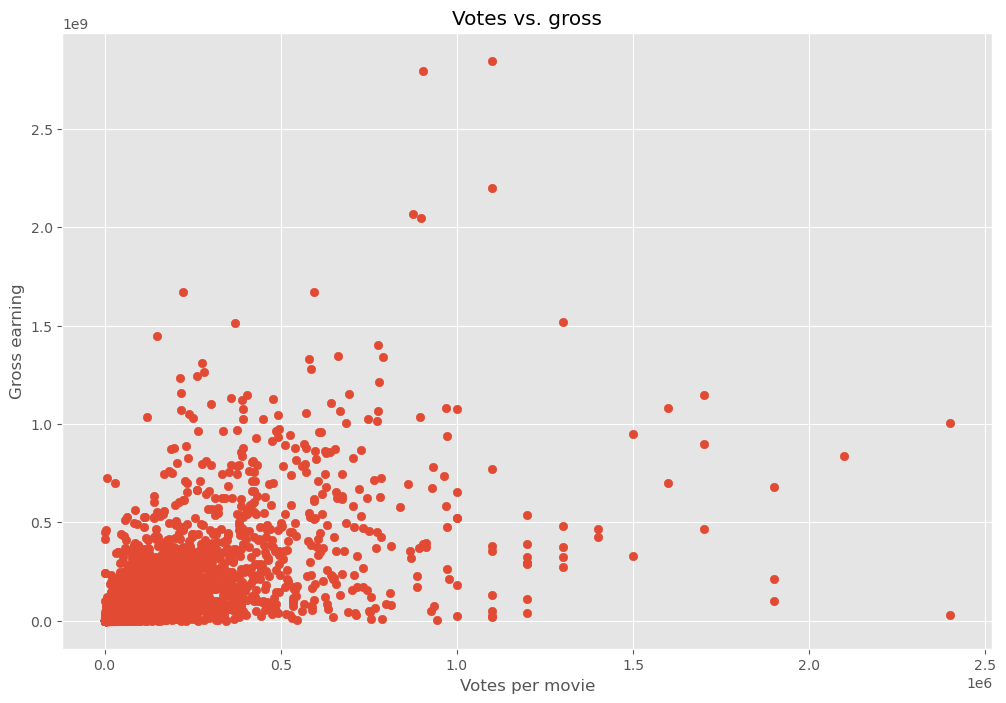

In [32]:
plt.scatter(x=df_numerized['votes'],y=df_numerized['gross'])
plt.title('Votes vs. gross')
plt.xlabel('Votes per movie')
plt.ylabel('Gross earning')

plt.show()

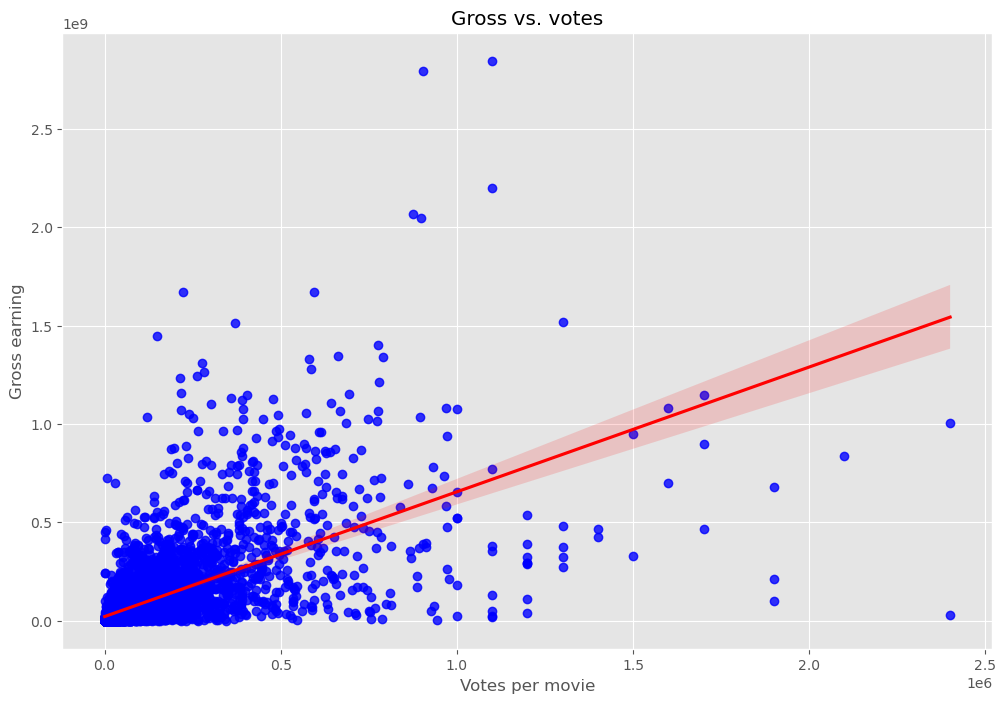

In [33]:
df_numerized['gross']=pd.to_numeric(df_numerized['gross'],errors='coerce')
df_numerized['votes']=pd.to_numeric(df_numerized['votes'],errors='coerce')
df_numerized=df_numerized.dropna(subset=['gross','votes'])

sns.regplot(x='votes',y='gross',data=df_numerized,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Gross vs. votes')
plt.xlabel('Votes per movie')
plt.ylabel('Gross earning')
plt.show()

## end